## Fuzzy Inference System

<img src="images/image-1.png"/>

<img src="images/image-2.png"/>

<img src="images/image-3.png"/>

<img src="images/image-4.png"/>

<img src="images/image-5.png"/>

## Buat Grafik dari masing2 variabel

Buat grafik seperti contoh di bawah ini menggunakan class dan function yang sudah dibuat sebelumnya

### https://github.com/agungperdananto/2025_kecerdasan_buatan

In [7]:
def decrease(x, min_value, max_value):
    result = (max_value - x) / (max_value - min_value)
    return result

def increase(x, min_value, max_value):
    result = (x - min_value) / (max_value - min_value)
    return result

# Permintaan
x = 4000
max_value = 5000
min_value = 1000

turun = decrease(x, max_value, min_value)
naik = increase(x, max_value, min_value)

print(f"Permintaan {turun=}, {naik=}")

# Persediaan
x = 300
max_value = 600
min_value = 100

sedikit = decrease(x, max_value, min_value)
banyak = increase(x, max_value, min_value)

print(f"Persediaan {sedikit=}, {banyak=}")

Permintaan turun=0.75, naik=0.25
Persediaan sedikit=0.4, banyak=0.6


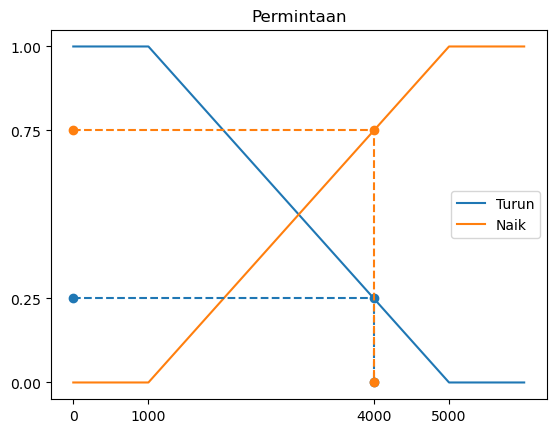

In [ ]:
from matplotlib import pyplot as plt

class Permintaan():
    range = [1000, 5000]
    y_turun = [1, 0]
    y_naik = [0, 1] 

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.x = 4000

    @property
    def turun(self):
        if self.x < self.min_value:
            return 1
        if self.x > self.max_value:
            return 0
        result = decrease(self.x, self.min_value, self.max_value)
        return result

    @property
    def naik(self):
        if self.x < self.min_value:
            return 0
        if self.x > self.max_value:
            return 1
        result = increase(self.x, self.min_value, self.max_value)
        return result

    def get_graph(self):

        fig, ax = plt.subplots(1)
        extended_range = [0, *self.range, self.range[1] + self.range[1]*0.2]
        extended_y_turun = [self.y_turun[0], *self.y_turun, self.y_turun[-1]]
        extended_y_naik = [self.y_naik[0], *self.y_naik, self.y_naik[-1]]
        # turun
        x_turun = extended_range # nilai x
        y_turun = extended_y_turun # nilai y
        
        ax.plot(x_turun, y_turun, label='Turun', color='C0')

        # naik
        x_naik = extended_range # nilai x
        y_naik = extended_y_naik # nilai y
        
        ax.plot(x_naik, y_naik, label='Naik', color='C1')
    
        ax.set_title('Permintaan')
        ax.legend(loc='center right')
        
        x_ticks = [0, 1000, 5000]
        y_ticks = [1, 0]
        
        plt.setp(ax, xticks= x_ticks, yticks=y_ticks)
        
        if self.x:
            x_fuzzy = [0, self.x, self.x]
            y_fuzzy_turun = [self.turun, self.turun, 0]
            ax.plot(x_fuzzy, y_fuzzy_turun,'o--', color='C0')
            y_fuzzy_naik = [self.naik, self.naik, 0]
            ax.plot(x_fuzzy, y_fuzzy_naik,'o--', color='C1')
            x_ticks.append(self.x)
            y_ticks = [*y_ticks, self.turun, self.naik]
        
        plt.setp(ax, xticks= x_ticks, yticks=y_ticks)


class Persediaan():
    range = [100, 600]

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.x = 300

    @property
    def sedikit(self):
        if self.x < self.min_value:
            return 1
        if self.x > self.max_value:
            return 0
        result = decrease(self.x, self.min_value, self.max_value)
        return result

    @property
    def banyak(self):
        if self.x < self.min_value:
            return 0
        if self.x > self.max_value:
            return 1
        result = increase(self.x, self.min_value, self.max_value)
        return result


pmt = Permintaan()

psd = Persediaan()

# pmt.x = 400
pmt.get_graph()


In [28]:
class Produksi():
    range = [2000, 7000]

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.permintaan = Permintaan()
        self.persediaan = Persediaan()

    @property
    def pmt_naik(self):
        return self.permintaan.naik

    @property
    def pmt_turun(self):
        return self.permintaan.turun

    @property
    def psd_banyak(self):
        return self.persediaan.banyak

    @property
    def psd_sedikit(self):
        return self.persediaan.sedikit

    def berkurang(self, fuzzy_value):
        return self.max_value - fuzzy_value * (self.max_value - self.min_value) 

    def bertambah(self, fuzzy_value):
        return fuzzy_value * (self.max_value - self.min_value) + self.min_value

    def rule(self):
        # Rule 1
        #     IF permintaan TURUN and persediaan BANYAK THEN produksi barang BERKURANG
        prod_fuzzy1 = min(self.pmt_turun, self.psd_banyak)
        prod_value1 = self.berkurang(prod_fuzzy1)
        # Rule 2
        #     IF permintaan TURUN and persediaan SEDIKIT THEN produksi barang BERKURANG
        prod_fuzzy2 = min(self.pmt_turun, self.psd_sedikit)
        prod_value2 = self.berkurang(prod_fuzzy2)
        # Rule 3
        #     IF permintaan NAIK and persediaan BANYAK THEN produksi barang BERTAMBAH
        prod_fuzzy3 = min(self.pmt_naik, self.psd_banyak)
        prod_value3 = self.bertambah(prod_fuzzy3)
        # Rule 4
        #     IF permintaan NAIK and persediaan SEDIKIT THEN produksi barang BERTAMBAH
        prod_fuzzy4 = min(self.pmt_naik, self.psd_sedikit)
        prod_value4 = self.bertambah(prod_fuzzy4)

        print(f"{prod_fuzzy1=}, {prod_fuzzy2=}, {prod_fuzzy3=}, {prod_fuzzy4=}")
        print(f"{prod_value1=}, {prod_value2=}, {prod_value3=}, {prod_value4=}")
        prod_fuzzy = [prod_fuzzy1, prod_fuzzy2, prod_fuzzy3, prod_fuzzy4]
        prod_value = [prod_value1, prod_value2, prod_value3, prod_value4]
        return prod_fuzzy, prod_value

    def defuzifikasi(self):
        prod_fuzzy, prod_value = self.rule()
        # print(prod_fuzzy, prod_value)
        # print(sum(prod_fuzzy))
        # _fuzzy = 0
        # for index in range(len(prod_fuzzy)):
        #     _fuzzy += (prod_fuzzy[index] * prod_value[index])
        
        return int(sum([prod_fuzzy[index] * prod_value[index] for index in range(len(prod_fuzzy))])/ sum(prod_fuzzy))

In [29]:
prod = Produksi()
prod.defuzifikasi()


prod_fuzzy1=0.25, prod_fuzzy2=0.25, prod_fuzzy3=0.4, prod_fuzzy4=0.6
prod_value1=5750.0, prod_value2=5750.0, prod_value3=4000.0, prod_value4=5000.0


4983

In [11]:
prod = Produksi()

print(f"{prod.pmt_turun=}\n {prod.pmt_naik=}\n {prod.psd_sedikit=}\n {prod.psd_banyak=}")



prod.pmt_turun=0.25
 prod.pmt_naik=0.75
 prod.psd_sedikit=0.6
 prod.psd_banyak=0.4
